<a href="https://colab.research.google.com/github/sofiasawczenko/image-me/blob/main/ComputerVision2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMPUTER VISION

*Utilizando o OpenCV para detecção de faixas de rua*

In [2]:
#Importar biblioteca
import cv2 as cv
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#caregar imagens 
upload = files.upload()

Saving lane_detection.jpeg to lane_detection.jpeg


<class 'numpy.ndarray'>
tamanho da imagem:  (393, 700, 3)


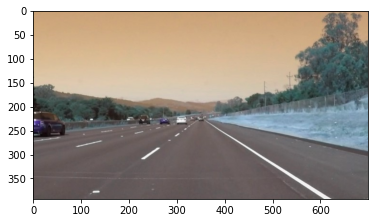

In [5]:
#preparar a imagem
imagem = (r'lane_detection.jpeg')
img_cv = cv.imread(imagem)
print(type(img_cv))
print('tamanho da imagem: ', img_cv.shape)

plt.imshow(img_cv)

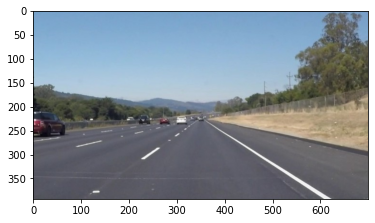

In [6]:
#passar para RGB
img = cv.cvtColor(img_cv, cv.COLOR_BGR2RGB)
plt.imshow(img)

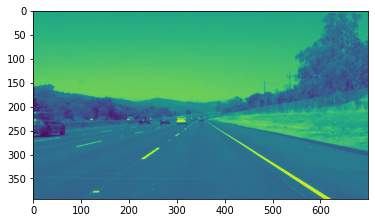

In [7]:
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
plt.imshow(img_gray)

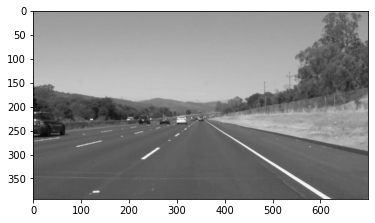

In [8]:
plt.imshow(img_gray, cmap = plt.cm.gray)

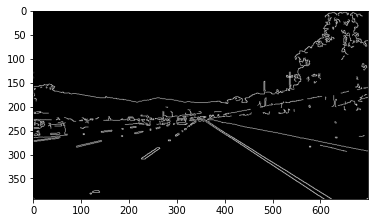

In [11]:
#deteccão de bordas com Canny 
linhas = cv.Canny(img_gray,100,200)
plt.imshow(linhas, cmap = 'gray')
plt.show()

Saving lane_detection.jpeg to lane_detection (1).jpeg
<class 'numpy.ndarray'>
Tamanho da imagem:  (393, 700, 3)
73 146


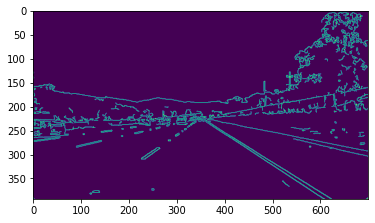

In [18]:
#Bibliotecas
import cv2 as cv
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np

upload = files.upload()

#preparar a imagem
imagem = (r'lane_detection.jpeg')
img_cv = cv.imread(imagem)
print(type(img_cv))
print('Tamanho da imagem: ', img_cv.shape)
plt.imshow(img_cv)

img = cv.cvtColor(img_cv, cv.COLOR_BGR2RGB)
plt.imshow(img)

img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
plt.imshow(img_gray)


#FUNCAO PARA GERAR THRESHOLD AUTOMATICO
def auto_canny(image, sigma=0.33):
     # compute the median of the single channel pixel intensities
     v = np.median(image)

     # apply automatic Canny edge detection using the computed median
     lower = int(max(0, (1.0 - sigma) * v))
     upper = int(min(255, (1.0 + sigma) * v))
     edged = cv.Canny(image, lower, upper)
     print(lower, upper)
     # return the edged image
     return edged


img_canny = auto_canny(img)
plt.imshow(img_canny)

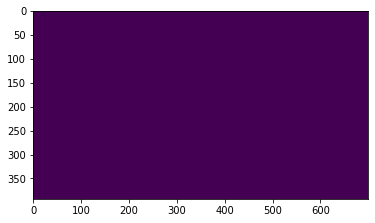

In [19]:
mask = np.zeros_like(img_canny)
h, w = img_canny.shape
plt.imshow(mask)

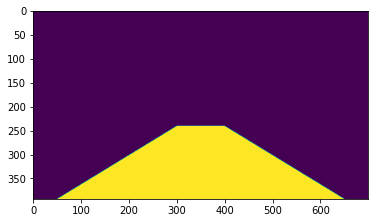

In [20]:
  #Gerar a Mascara
pts = np.array([[50,h],[300,240],[400,240],[650,h]], dtype=np.int32) # P1, P2, P3, P4
mask_fillpoly = mask
mask_filled = cv.fillPoly(mask_fillpoly, [pts], (255, 255, 255))
plt.imshow(mask_filled)

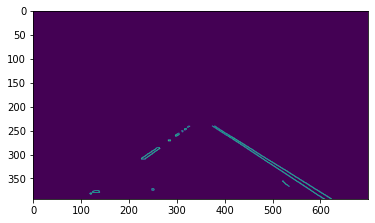

In [23]:
masked_image = cv.bitwise_and(img_canny, mask_filled)
plt.imshow(masked_image)